In [1]:
import numpy as np 
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler  # 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv('./../Dataset/US_Heart_Patients_2.csv')

### Classification -

    1. Logistic Regression
    2. DT Classifier             - (probability)
    3. Naive Bayes Classifier    - (conditional probability)
    4. Random forest Classifier
    5. Linear Discriminant
    6. XG boost
    7. Gradient boost
    8. SVM

## Logistic Regression (log)

it can do classification and probability of that class

In [7]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.58,8.57,32.00,42.00,49.0,56.00,70.0
education,4130.0,1.98,1.02,1.00,1.00,2.0,3.00,4.0
currentSmoker,4237.0,0.49,0.50,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4209.0,9.00,11.92,0.00,0.00,0.0,20.00,70.0
BP Meds,4180.0,0.03,0.17,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4231.0,0.01,0.08,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4238.0,0.31,0.46,0.00,0.00,0.0,1.00,1.0
diabetes,4238.0,0.03,0.16,0.00,0.00,0.0,0.00,1.0
tot cholesterol,4180.0,236.68,44.62,107.00,206.00,234.0,263.00,696.0
Systolic BP,4236.0,132.36,22.04,83.50,117.00,128.0,144.00,295.0


In [9]:
cat = ['education','currentSmoker','BP Meds','prevalentStroke','prevalentHyp','diabetes','Gender']
num = ['age','cigsPerDay','tot cholesterol','Systolic BP','Diastolic BP','BMI','heartRate','glucose'] 

In [11]:
round(df[num].describe().T,2)

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.58,8.57,32.00,42.00,49.0,56.00,70.0
cigsPerDay,4209.0,9.00,11.92,0.00,0.00,0.0,20.00,70.0
tot cholesterol,4180.0,236.68,44.62,107.00,206.00,234.0,263.00,696.0
Systolic BP,4236.0,132.36,22.04,83.50,117.00,128.0,144.00,295.0
Diastolic BP,4235.0,82.90,11.91,48.00,75.00,82.0,90.00,142.5
BMI,4216.0,25.80,4.08,15.54,23.07,25.4,28.04,56.8
heartRate,4236.0,75.87,12.00,44.00,68.00,75.0,83.00,143.0
glucose,3849.0,81.95,23.96,40.00,71.00,78.0,87.00,394.0


#### when we divide std/mean, it's called coefficient of variation

In [14]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BP Meds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot cholesterol',
       'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att'],
      dtype='object')

In [16]:
df.isnull().sum()*100/df.shape[0]

Gender             0.188679
age                0.047170
education          2.594340
currentSmoker      0.070755
cigsPerDay         0.731132
BP Meds            1.415094
prevalentStroke    0.212264
prevalentHyp       0.047170
diabetes           0.047170
tot cholesterol    1.415094
Systolic BP        0.094340
Diastolic BP       0.117925
BMI                0.566038
heartRate          0.094340
glucose            9.221698
Heart-Att          0.000000
dtype: float64

In [18]:
df.isnull().sum()*100/df.shape[0]

Gender             0.188679
age                0.047170
education          2.594340
currentSmoker      0.070755
cigsPerDay         0.731132
BP Meds            1.415094
prevalentStroke    0.212264
prevalentHyp       0.047170
diabetes           0.047170
tot cholesterol    1.415094
Systolic BP        0.094340
Diastolic BP       0.117925
BMI                0.566038
heartRate          0.094340
glucose            9.221698
Heart-Att          0.000000
dtype: float64

#### Null Variable Num Treatment

In [21]:
for i in num:
    df[i].fillna(df[i].mean, inplace=True)

In [23]:
df.isnull().sum()

Gender               8
age                  0
education          110
currentSmoker        3
cigsPerDay           0
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol      0
Systolic BP          0
Diastolic BP         0
BMI                  0
heartRate            0
glucose              0
Heart-Att            0
dtype: int64

#### Null Variable Cat Treatment

In [26]:
for i in cat:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [28]:
df.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

In [32]:
df.dtypes

Gender              object
age                 object
education          float64
currentSmoker      float64
cigsPerDay          object
BP Meds            float64
prevalentStroke    float64
prevalentHyp       float64
diabetes           float64
tot cholesterol     object
Systolic BP         object
Diastolic BP        object
BMI                 object
heartRate           object
glucose             object
Heart-Att            int64
dtype: object

In [34]:
# List of columns to convert
num = ['age','cigsPerDay','tot cholesterol','Systolic BP','Diastolic BP','BMI','heartRate','glucose'] 

# Convert each column in the list to numeric, coercing errors to NaN
for col in num:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check the data types after conversion
print(df.dtypes)

Gender              object
age                float64
education          float64
currentSmoker      float64
cigsPerDay         float64
BP Meds            float64
prevalentStroke    float64
prevalentHyp       float64
diabetes           float64
tot cholesterol    float64
Systolic BP        float64
Diastolic BP       float64
BMI                float64
heartRate          float64
glucose            float64
Heart-Att            int64
dtype: object


In [36]:
df[num].corr()

,age,cigsPerDay,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose
age,1.000000,-0.192650,0.262766,0.394171,0.205470,0.135013,-0.011286,0.121767
cigsPerDay,-0.192650,1.000000,-0.026347,-0.089327,-0.057158,-0.093346,0.074742,-0.058460
tot cholesterol,0.262766,-0.026347,1.000000,0.208652,0.164058,0.115813,0.091466,0.046644
Systolic BP,0.394171,-0.089327,0.208652,1.000000,0.784030,0.326623,0.183439,0.140251
Diastolic BP,0.205470,-0.057158,0.164058,0.784030,1.000000,0.377113,0.181653,0.060501
BMI,0.135013,-0.093346,0.115813,0.326623,0.377113,1.000000,0.068369,0.086618
heartRate,-0.011286,0.074742,0.091466,0.183439,0.181653,0.068369,1.000000,0.094261
glucose,0.121767,-0.058460,0.046644,0.140251,0.060501,0.086618,0.094261,1.000000


In [38]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [291]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.1,85.0,85.0,0


In [40]:
df['Gender'] = df['Gender'].replace(to_replace=['Male','Female'], value=[1,0])

In [42]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,1,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [44]:
df['Heart-Att'].unique()

array([0, 1], dtype=int64)

In [50]:
df.dtypes

Gender               int64
age                float64
education          float64
currentSmoker      float64
cigsPerDay         float64
BP Meds            float64
prevalentStroke    float64
prevalentHyp       float64
diabetes           float64
tot cholesterol    float64
Systolic BP        float64
Diastolic BP       float64
BMI                float64
heartRate          float64
glucose            float64
Heart-Att            int64
dtype: object

In [48]:
# # List of columns to convert
# Num = ['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'BMI', 'heartRate', 'glucose']

# # Convert each column in the list to numeric, coercing errors to NaN
# for col in Num:
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# # Check the data types after conversion
# print(df.dtypes)

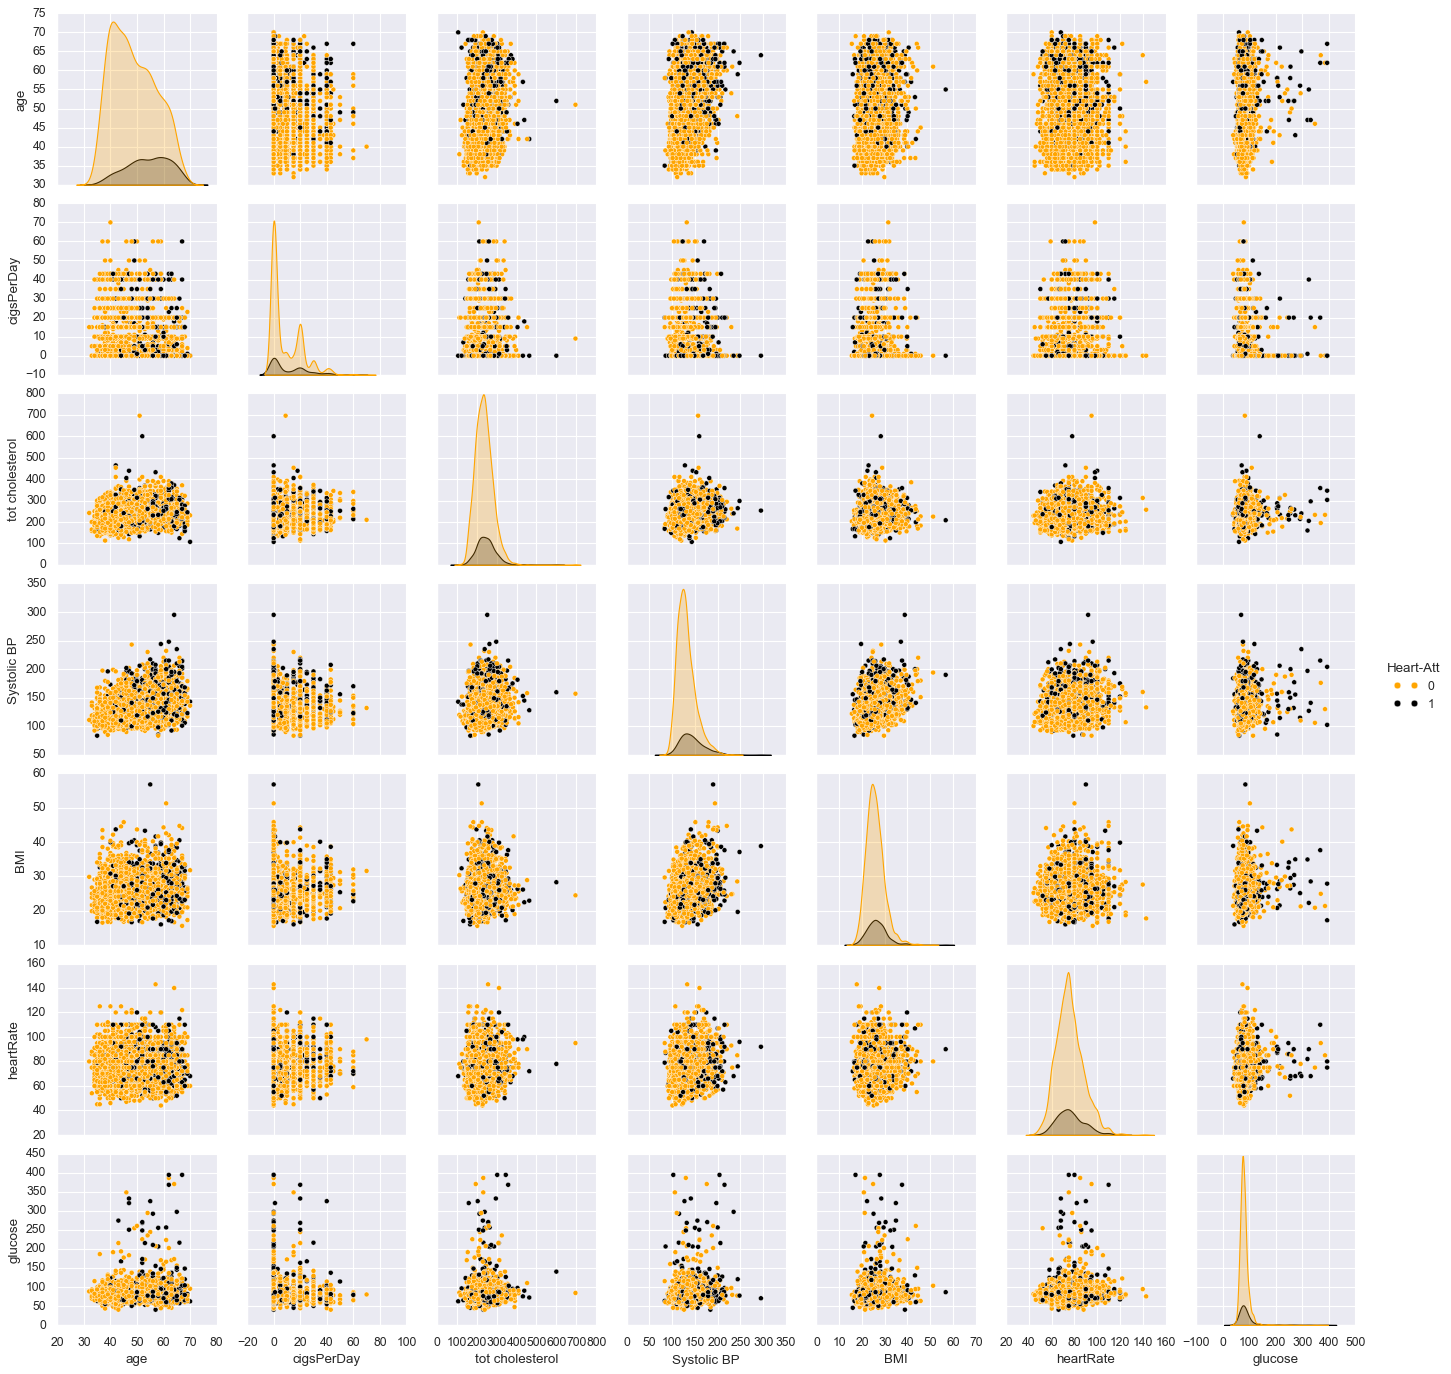

In [74]:
# Set the Matplotlib style to 'dark_background'
plt.style.use('dark_background')

# Set the theme and style
sns.set_style(style="darkgrid")
sns.set_palette("magma")

sns.pairplot(df[['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'BMI', 'heartRate', 'glucose', 'Heart-Att']],
             hue='Heart-Att',
             palette=['orange','black'])  #orange is safe and black is heart-attack

In [304]:
df['Diastolic BP'] = pd.to_numeric(df['Diastolic BP'], errors='coerce')

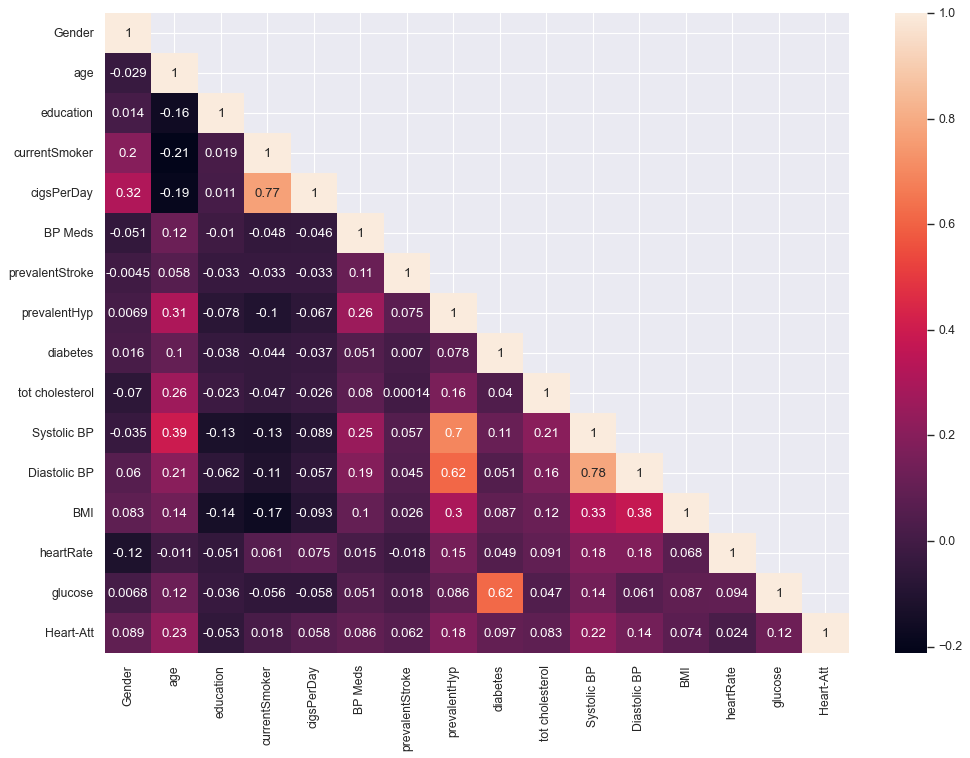

In [76]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True,mask=np.triu(df.corr(),+1)); #triu means trim the upper part

In [78]:
data = df.copy()

In [80]:
df.drop(['diabetes', 'currentSmoker', 'Diastolic BP',], axis=1, inplace=True)

In [82]:
df.head()

,Gender,age,education,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,tot cholesterol,Systolic BP,BMI,heartRate,glucose,Heart-Att
0,1,39.0,4.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.0,0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.0,0
2,1,48.0,1.0,20.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.0,0
3,0,61.0,3.0,30.0,0.0,0.0,1.0,225.0,150.0,28.58,65.0,103.0,1
4,0,46.0,3.0,23.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.0,0


# Outlier Removal / Treatment

In [90]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

Num = ['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'BMI', 'heartRate', 'glucose']

for column in df[Num].columns: 
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

<Axes: >

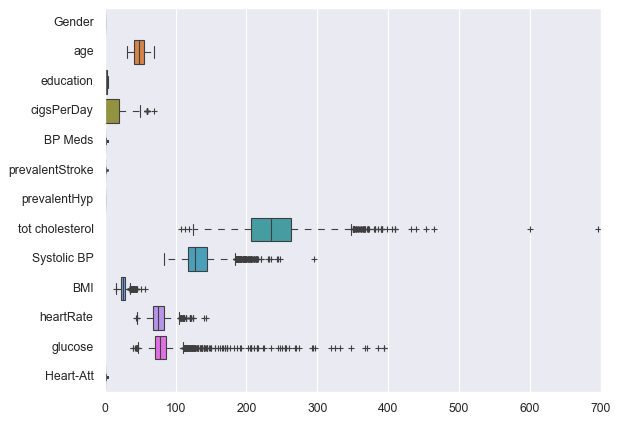

In [98]:
sns.boxplot(df, orient='h')

In [92]:
df.head()

,Gender,age,education,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,tot cholesterol,Systolic BP,BMI,heartRate,glucose,Heart-Att
0,1,39.0,4.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.0,0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.0,0
2,1,48.0,1.0,20.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.0,0
3,0,61.0,3.0,30.0,0.0,0.0,1.0,225.0,150.0,28.58,65.0,103.0,1
4,0,46.0,3.0,23.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.0,0


### Test-Train Data

In [100]:
# Copy all the predictor variables into X dataframe
X = df.drop('Heart-Att', axis=1)

# Copy target into the y dataframe.
Y = df['Heart-Att']

In [102]:
X.head()

,Gender,age,education,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,tot cholesterol,Systolic BP,BMI,heartRate,glucose
0,1,39.0,4.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.0
2,1,48.0,1.0,20.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.0
3,0,61.0,3.0,30.0,0.0,0.0,1.0,225.0,150.0,28.58,65.0,103.0
4,0,46.0,3.0,23.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.0


In [116]:
X.isna().sum()

Gender               0
age                  2
education            0
cigsPerDay          31
BP Meds              0
prevalentStroke      0
prevalentHyp         0
tot cholesterol     60
Systolic BP          4
BMI                 24
heartRate            4
glucose            391
dtype: int64

In [134]:
Y.isna().sum()

0

In [136]:
# Identify columns with missing values
cols_with_missing = X.columns[X.isnull().any()]

In [138]:
cols_with_missing

Index(['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'BMI',
       'heartRate', 'glucose'],
      dtype='object')

In [128]:
# Calculate the percentage of missing values in each column
missing_percentage = (X.isnull().sum() / len(X)) * 100

# Print the percentage of missing values
print(missing_percentage) 

Gender             0.000000
age                0.047170
education          0.000000
cigsPerDay         0.731132
BP Meds            0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
tot cholesterol    1.415094
Systolic BP        0.094340
BMI                0.566038
heartRate          0.094340
glucose            9.221698
dtype: float64


there are NaN values in X so we need to replace them

In [140]:
from sklearn.impute import SimpleImputer

# Create an imputer object using the 'median' strategy
imputer = SimpleImputer(strategy='median') 

# Fit and transform the imputer on your data
X[cols_with_missing] = imputer.fit_transform(X[cols_with_missing])

#====================================== above is fine for now ==========================


# Create imputers
# num_imputer = SimpleImputer(strategy='median')
# cat_imputer = SimpleImputer(strategy='most_frequent')  # we don't need this now as NAN only present in numerical colimns

# Impute numerical columns
# num_cols = cols_with_missing[cols_with_missing.isin(X._get_numeric_data().columns)]
# df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [142]:
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: Heart-Att, dtype: int64

In [144]:
X.isna().sum()

Gender             0
age                0
education          0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
tot cholesterol    0
Systolic BP        0
BMI                0
heartRate          0
glucose            0
dtype: int64

In [146]:
# Split X and Y into training and test set in 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state= 1) 

### Model Building

In [148]:
model = LogisticRegression()

In [150]:
model.fit(X_train, Y_train)

LogisticRegression()

#### Model Evaluation

In [155]:
y_train_predict = model.predict(X_train)

In [157]:
y_train_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Accuracy = (correct)/(total prediction)

##### Accuracy check

In [167]:
## Accuracy of the model
model.score(X_train, Y_train)

0.8480458221024259

accuracy is not the best way to judge a model

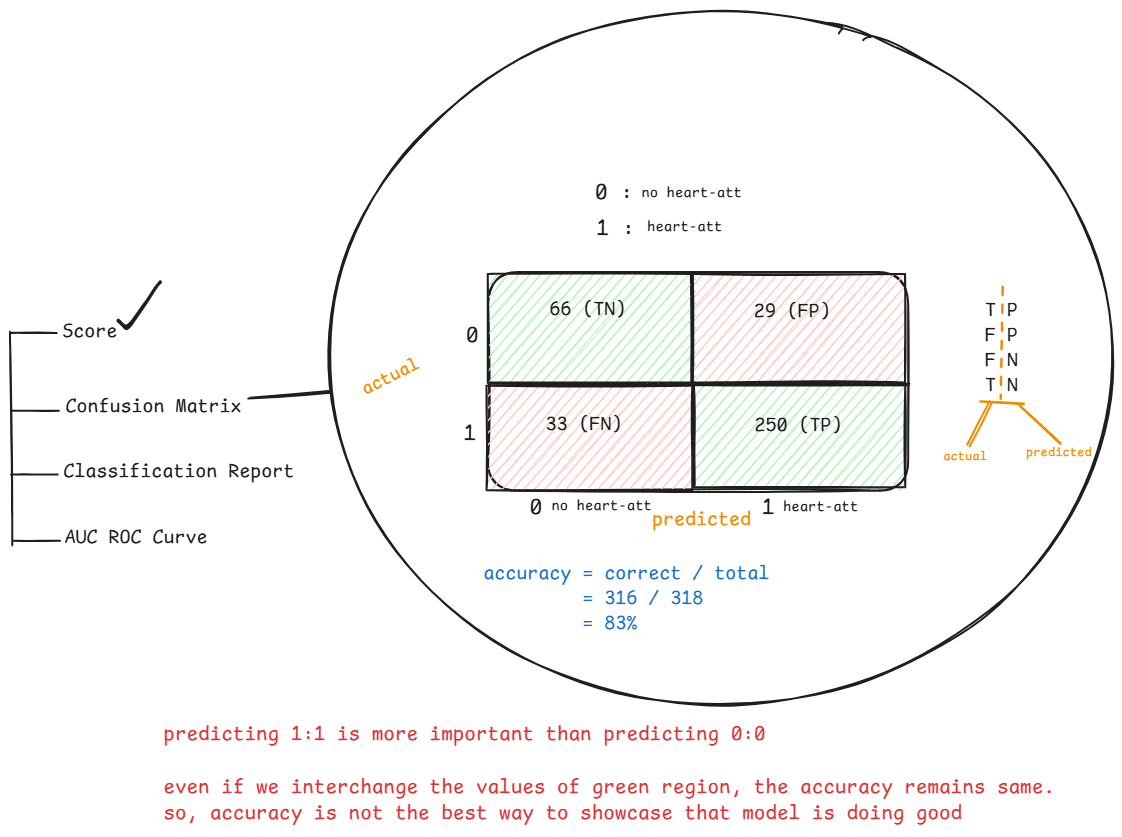

#### Confusion Matrix

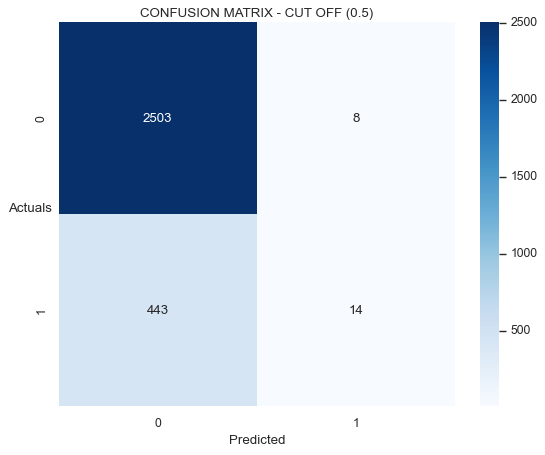

In [181]:
sns.heatmap((metrics.confusion_matrix(Y_train, y_train_predict)), annot=True, fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)');

In [177]:
metrics.confusion_matrix(Y_train, y_train_predict)

array([[2503,    8],
       [ 443,   14]], dtype=int64)